In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import os
import json

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
berlin = pd.read_csv('raw/wordcloud.csv', header=3)

In [3]:
# rename columns

(
    berlin
    .rename(
        columns={
            'time': 'day', 
            'weather_code (wmo code)' : 'weather_code',
        }, 
        inplace=True
    )
)

berlin = berlin.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
berlin.head()

,day,weather_code
0,2025-04-04T01:00,0
1,2025-04-04T02:00,0
2,2025-04-04T03:00,0
3,2025-04-04T04:00,0
4,2025-04-04T05:00,0


In [4]:
# add weather code in words

with open("raw/descriptions.json") as f:
    weather_dict = json.load(f)

In [5]:
berlin['weather_code'] = berlin['weather_code'].astype(str)

In [6]:
berlin['weather_description'] = berlin['weather_code'].map( lambda x: weather_dict.get(x, {}).get('day', {}).get('description', 'Unknown'))

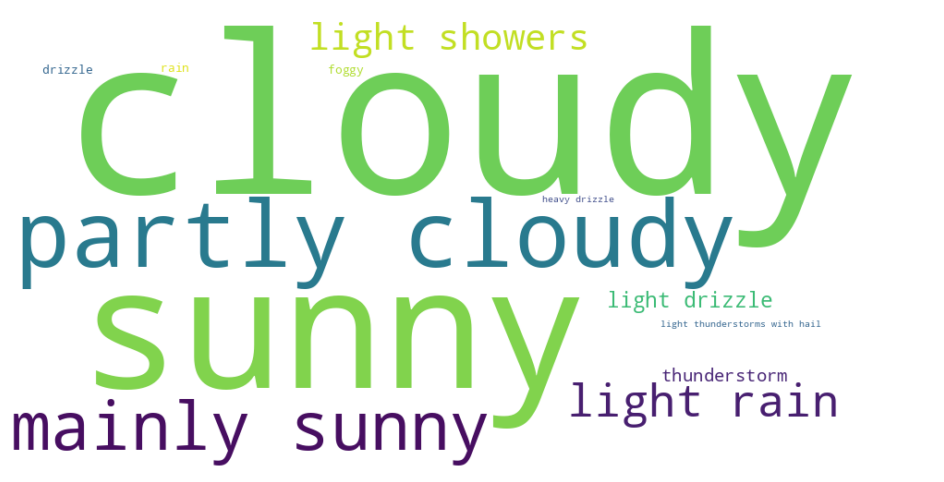

In [7]:
#Trying a wordcloud for fun woth Chat GPT

text_berlin = ', '.join(berlin['weather_description'].dropna().astype(str))
# text_brooklyn = ', '.join(df['weather_description_berlin'].dropna().astype(str))

# Step 1: Normalize the text
words = text_berlin.split(',')                     # split at commas
words = [w.strip().lower() for w in words]      # remove whitespace and lowercase

# Step 2 (optional): inspect unique values
unique_words = sorted(set(words))
# print(unique_words)  # check if there are still duplicates like 'cloudy ' or 'cloudy\n'

# Step 3: Count frequencies
word_counts = Counter(words)

# Step 4: Generate word cloud
wordcloud = WordCloud(
    width=1000, height=500,
    background_color='white'
).generate_from_frequencies(word_counts)

# Step 5: Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

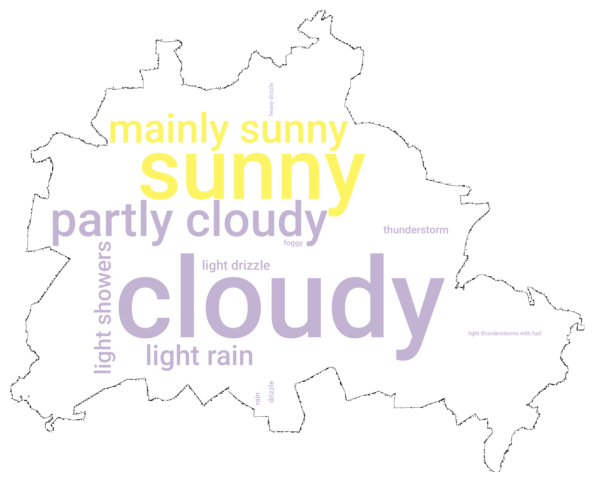

In [10]:
# Load mask image
cloud_mask = np.array(Image.open("images/Berlin_new.jpg"))

# Font path (adjust as needed for your system)
font_path = "/Library/Fonts/Roboto-Medium.ttf"  # macOS example

# Custom color function: yellow for "sun" words, violet-grey otherwise
def sun_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if 'sun' in word.lower():
        return "#fdf464"  # sunny yellow
    else:
        return "#C3B3D3"  # violet-grey

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=cloud_mask,
    contour_color='black',
    contour_width=1,
    prefer_horizontal=0.4,
    font_path=font_path,
    min_font_size=5,
    color_func=sun_color_func
).generate_from_frequencies(word_counts)

# Plot it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


svg_string = wordcloud.to_svg()

with open("berlin_wordcloud.svg", "w") as svg_file:
    svg_file.write(svg_string)


In [ ]:
brooklyn = pd.read_csv('raw/wordcloud_brooklyn.csv', header=3)

In [ ]:
# rename columns

(
    brooklyn
    .rename(
        columns={
            'time': 'day', 
            'weather_code (wmo code)' : 'weather_code',
        }, 
        inplace=True
    )
)

brooklyn.head()

In [ ]:
# add weather code in words

with open("raw/descriptions.json") as f:
    weather_dict = json.load(f)

In [ ]:
berlin['weather_code'] = berlin['weather_code'].astype(str)

In [ ]:
berlin['weather_description'] = berlin['weather_code'].map( lambda x: weather_dict.get(x, {}).get('day', {}).get('description', 'Unknown'))

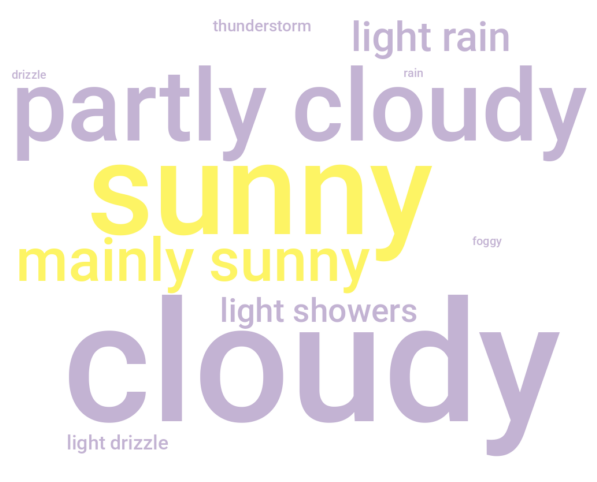

In [11]:
# Load mask image
cloud_mask = np.array(Image.open("images/Brooklyn-final.png").convert("L"))

# Font path (adjust as needed for your system)
font_path = "/Library/Fonts/Roboto-Medium.ttf"  # macOS example

# Custom color function: yellow for "sun" words, violet-grey otherwise
def sun_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if 'sun' in word.lower():
        return "#fdf464"  # sunny yellow
    else:
        return "#C3B3D3"  # violet-grey

# Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=800,
    background_color='white',
    # mask=cloud_mask,
    contour_color='black',
    contour_width=1,
    prefer_horizontal=0.8,
    font_path=font_path,
    min_font_size=18,
    color_func=sun_color_func
).generate_from_frequencies(word_counts)

# Plot it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



svg_string = wordcloud.to_svg()

with open("images/brooklyn_wordcloud.svg", "w") as svg_file:
    svg_file.write(svg_string)